In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, classification_report

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv('data/airline_model_data.csv')

# KNN

#### Baseline

In [5]:
df['satisfaction_binary'].value_counts(normalize = True) * 100

satisfaction_binary
0    56.666731
1    43.333269
Name: proportion, dtype: float64

#### Train/Test Split

In [7]:
X = df.drop(columns = ['satisfaction_binary', 'id', 'unnamed:_0'])
y = df['satisfaction_binary']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42, stratify = y)

#### Standard Scaler

In [10]:
# Instantiate Standard Scaler
sc = StandardScaler()

In [11]:
# Fit and transform to training set
X_train_sc = sc.fit_transform(X_train)

In [12]:
# Transform test set
X_test_sc = sc.transform(X_test)

#### Instantiate KNN

In [14]:
knn = KNeighborsClassifier(n_neighbors = 8)

#### Model Fitting and Evaluation

In [16]:
knn.fit(X_train_sc, y_train)

KNeighborsClassifier(n_neighbors=8)

In [17]:
knn.score(X_train_sc, y_train)

0.9371293143895192

In [18]:
knn.score(X_test_sc, y_test)

0.9264231750156393

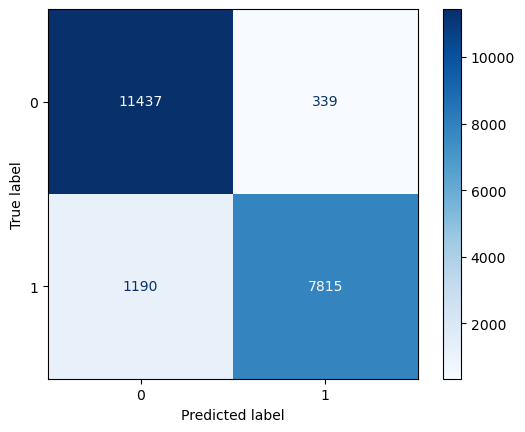

In [19]:
ConfusionMatrixDisplay.from_estimator(knn, X_test_sc, y_test, cmap = 'Blues');

In [20]:
for k in [3, 5, 7, 9, 11]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_sc, y_train)
    print(f"k = {k} → Accuracy: {knn.score(X_test_sc, y_test):.4f}")

k = 3 → Accuracy: 0.9268
k = 5 → Accuracy: 0.9287
k = 7 → Accuracy: 0.9286
k = 9 → Accuracy: 0.9282
k = 11 → Accuracy: 0.9274


              precision    recall  f1-score   support

           0       0.91      0.96      0.94     11776
           1       0.95      0.88      0.91      9005

    accuracy                           0.93     20781
   macro avg       0.93      0.92      0.93     20781
weighted avg       0.93      0.93      0.93     20781



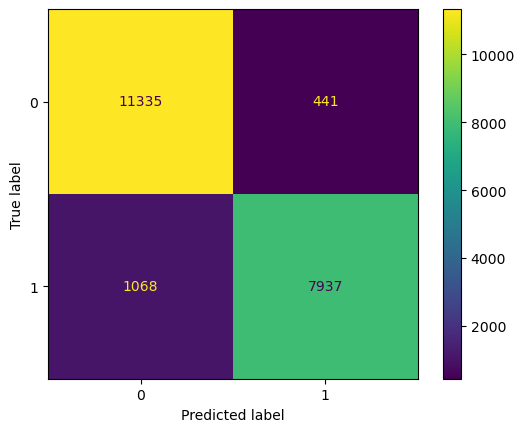

In [37]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

y_pred_knn = knn.predict(X_test_sc)
print(classification_report(y_test, y_pred_knn))
ConfusionMatrixDisplay.from_estimator(knn, X_test_sc, y_test)